In [96]:
import numpy as np
import pandas as pd

In [97]:
# goal for this doc is to clean it up and make as much sense as possible with
# the knowledge i have! let's go.

In [98]:
lol = pd.read_csv('data/matchinfo.csv')
lol.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,...,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,...,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,...,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,...,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,...,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...


In [99]:
# current mem size
lol.memory_usage(deep=True).sum()

13374884

In [100]:
# current data types, let's clean up the ints first
lol.dtypes

League              object
Year                 int64
Season              object
Type                object
blueTeamTag         object
bResult              int64
rResult              int64
redTeamTag          object
gamelength           int64
blueTop             object
blueTopChamp        object
blueJungle          object
blueJungleChamp     object
blueMiddle          object
blueMiddleChamp     object
blueADC             object
blueADCChamp        object
blueSupport         object
blueSupportChamp    object
redTop              object
redTopChamp         object
redJungle           object
redJungleChamp      object
redMiddle           object
redMiddleChamp      object
redADC              object
redADCChamp         object
redSupport          object
redSupportChamp     object
Address             object
dtype: object

In [101]:
# looking at int types
# all of these can actually become either int16 or int8

(lol
    .select_dtypes(int)
    .describe()
)

,Year,bResult,rResult,gamelength
count,7620.000000,7620.000000,7620.000000,7620.000000
mean,2016.280971,0.544094,0.455906,37.012598
std,0.848200,0.498085,0.498085,7.983238
min,2014.000000,0.000000,0.000000,17.000000
25%,2016.000000,0.000000,0.000000,31.000000
50%,2016.000000,1.000000,0.000000,36.000000
75%,2017.000000,1.000000,1.000000,41.000000
max,2018.000000,1.000000,1.000000,95.000000


In [102]:
def lol_clean(lol):
    return (lol
    .astype({'Year':'int16', 'bResult':'int8', 'rResult':'int8', 'gamelength':'int8', 'League':'category', 'Season':'category', 'Type':'category'})
    .dropna()
    # .isnull().sum()
    # .memory_usage(deep=True)
    # .describe()
    # .sum()
)

In [103]:
lol_clean = lol_clean(lol)
lol_clean

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,...,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,...,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,...,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,...,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,...,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,TCL,2018,Spring,Season,YC,0,1,SUP,34,Elwind,...,Chogath,Stomaged,XinZhao,GBM,Veigar,Zeitnot,Xayah,SnowFlower,Rakan,https://matchhistory.euw.leagueoflegends.com/e...
7616,TCL,2018,Spring,Season,GAL,0,1,DP,39,Rare,...,Chogath,KaKAO,Ivern,Lucete,Ryze,Ruvelius,Caitlyn,Japone,Braum,https://matchhistory.euw.leagueoflegends.com/e...
7617,OPL,2018,Spring,Season,SIN,0,1,DW,24,Praedyth,...,Gangplank,Praelus,Evelynn,Triple,Malzahar,k1ng,Ezreal,Cupcake,Taric,https://matchhistory.na.leagueoflegends.com/en...
7618,OPL,2018,Spring,Season,LGC,1,0,TTC,35,Ceres,...,Gangplank,Swathe,JarvanIV,Shok,Veigar,Low,Sivir,Tilting,Janna,https://matchhistory.na.leagueoflegends.com/en...


<Axes: >

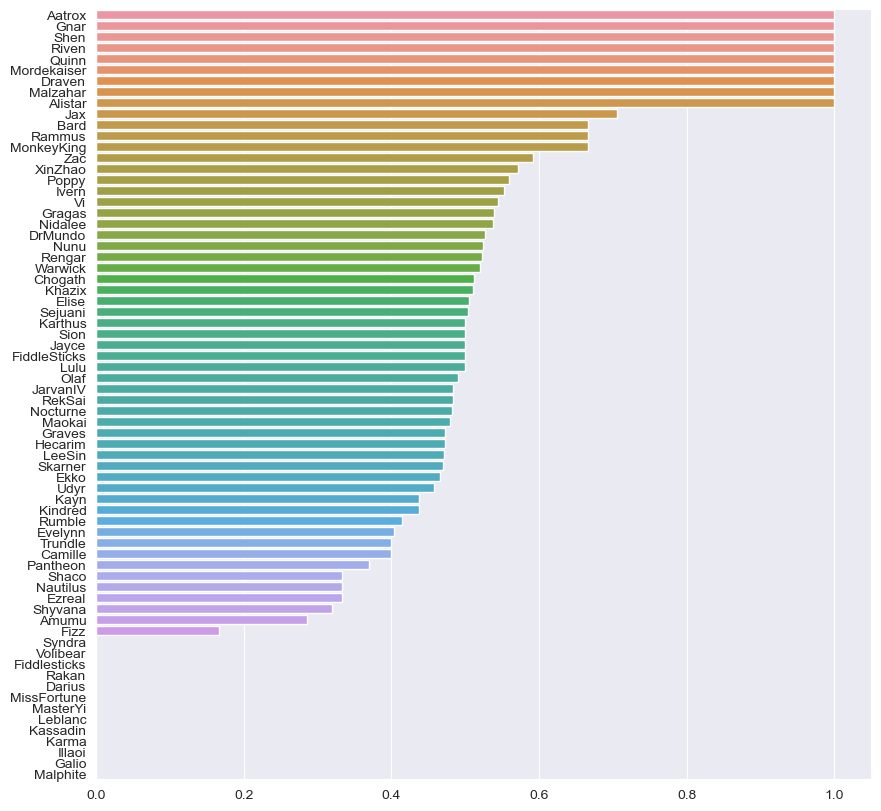

In [104]:
# curious to find some data about jungle winrates

# creating a series of winrates for the jungle champions on red team
redJungleSum = lol_clean.groupby(['redJungleChamp'])['rResult'].sum()
blueJungleSum = lol_clean.groupby(['blueJungleChamp'])['bResult'].sum()

redJungleCount = lol_clean.groupby(['redJungleChamp'])['rResult'].count()
blueJungleCount = lol_clean.groupby(['blueJungleChamp'])['bResult'].count()

# let's add the blue and red jungle wins together and calculate the winrate while fill nan with 0
allJungleSum = redJungleSum.add(blueJungleSum, fill_value=0)
allJungleCount = redJungleCount.add(blueJungleCount, fill_value=0)

# calculating the winrate by year
jungleWinrate = allJungleSum / allJungleCount
jungleWinrate = jungleWinrate.sort_values(ascending=False)
jungleWinrate

# let's plot a chart of the winrates
import matplotlib.pyplot as plt
import seaborn as sns

# setting the style
sns.set_style('darkgrid')

# creating the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# plotting the data
sns.barplot(x=jungleWinrate.values, y=jungleWinrate.index, ax=ax)

<Axes: >

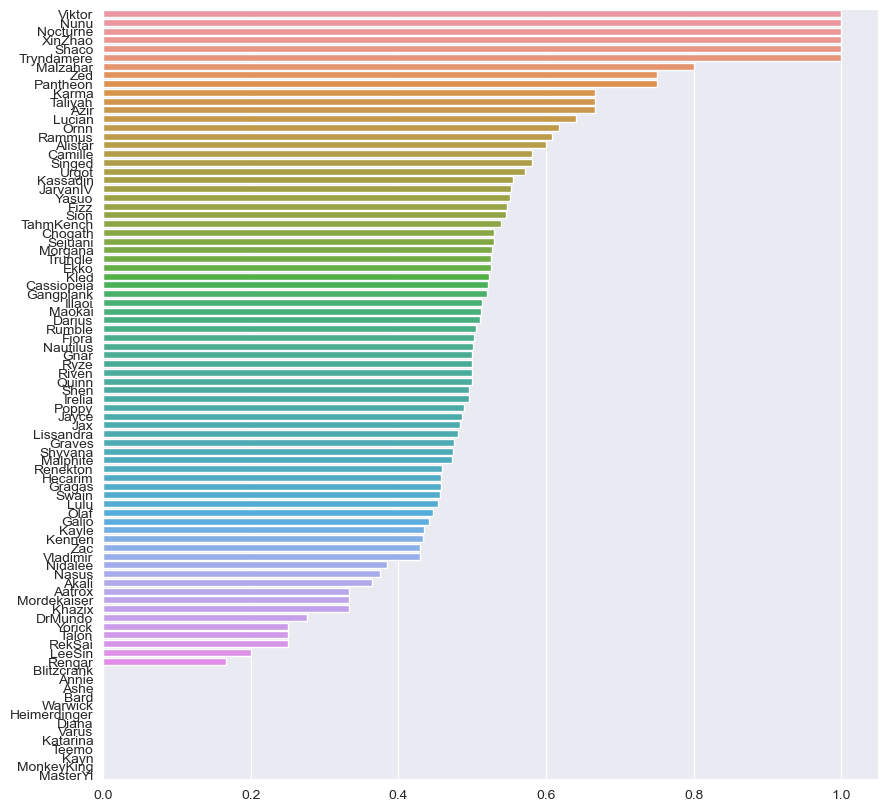

In [149]:
# creating a series of winrates for the jungle champions on red team
redTopSum = lol_clean.groupby(['redTopChamp'])['rResult'].sum()
blueTopSum = lol_clean.groupby(['blueTopChamp'])['bResult'].sum()

redTopCount = lol_clean.groupby(['redTopChamp'])['rResult'].count()
blueTopCount = lol_clean.groupby(['blueTopChamp'])['bResult'].count()

# let's add the blue and red jungle wins together and calculate the winrate while fill nan with 0
allTopSum = redTopSum.add(blueTopSum, fill_value=0)
allTopCount = redTopCount.add(blueTopCount, fill_value=0)

# calculating the winrate by year
TopWinrate = allTopSum / allTopCount
TopWinrate = TopWinrate.sort_values(ascending=False)
TopWinrate

# let's plot a chart of the winrates
import matplotlib.pyplot as plt
import seaborn as sns

# setting the style
sns.set_style('darkgrid')

# creating the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# plotting the data
sns.barplot(x=TopWinrate.values, y=TopWinrate.index, ax=ax)

In [ ]:
def laneWinRate()

# creating a series of winrates for the jungle champions on red team
redTopSum = lol_clean.groupby(['redTopChamp'])['rResult'].sum()
blueTopSum = lol_clean.groupby(['blueTopChamp'])['bResult'].sum()

redTopCount = lol_clean.groupby(['redTopChamp'])['rResult'].count()
blueTopCount = lol_clean.groupby(['blueTopChamp'])['bResult'].count()

# let's add the blue and red jungle wins together and calculate the winrate while fill nan with 0
allTopSum = redTopSum.add(blueTopSum, fill_value=0)
allTopCount = redTopCount.add(blueTopCount, fill_value=0)

# calculating the winrate by year
TopWinrate = allTopSum / allTopCount
TopWinrate = TopWinrate.sort_values(ascending=False)
TopWinrate

# let's plot a chart of the winrates
import matplotlib.pyplot as plt
import seaborn as sns

# setting the style
sns.set_style('darkgrid')

# creating the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# plotting the data
sns.barplot(x=TopWinrate.values, y=TopWinrate.index, ax=ax)

In [106]:
# let's look into cloud9's wins and losses over the years

# first let's isolate all the games that c9 played in
c9_b = lol_clean[lol_clean['blueTeamTag'] == 'C9']
c9_r = lol_clean[lol_clean['redTeamTag'] == 'C9']

# now let's isolate the columns we need
rCols = ['Year', 'rResult']
bCols = ['Year', 'bResult']

# isolating c9 blue and red positions
c9_b = c9_b[bCols]
c9_r = c9_r[rCols]

# grouping these positions by year
c9_b_played = c9_b.groupby('Year').count()
c9_r_played = c9_r.groupby('Year').count()

# now that we've isolated the correct win columns to each of these variables
# we can freely add them up without worrying of red+blue mixups

# renaming columns on both sides to Wins, so we can easily combine
c9_r.rename(columns={'rResult':'Wins'}, inplace=True)
c9_b.rename(columns={'bResult':'Wins'}, inplace=True)

# same with Played matches
c9_b_played.rename(columns={'bResult':'Played'}, inplace=True)
c9_r_played.rename(columns={'rResult':'Played'}, inplace=True)

# setting year to index
c9_r.set_index('Year', inplace=True)
c9_b.set_index('Year', inplace=True)

# grouping wins by year
c9_r = c9_r.groupby('Year').sum()
c9_b = c9_b.groupby('Year').sum()

# maths for wins and played series
c9wins = c9_r + c9_b
c9played = c9_r_played.add(c9_b_played, fill_value=0)

# creating overview dataframe
c9_overview = pd.concat([c9wins, c9played], axis=1)
c9_overview['Winrate'] = c9_overview['Wins'] / c9_overview['Played']

c9_overview

,Wins,Played,Winrate
Year,,,
2014,5,11,0.454545
2015,37,73,0.506849
2016,57,95,0.600000
2017,76,122,0.622951
2018,3,4,0.750000


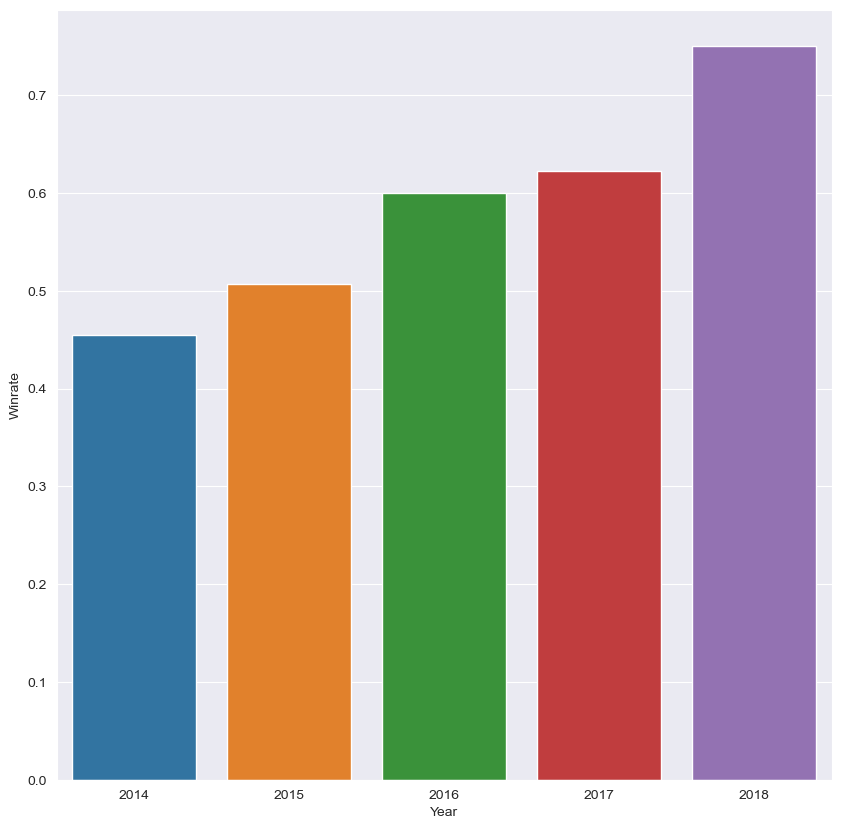

In [107]:
# plotting c9's winrate

sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(x=c9_overview.index, y=c9_overview['Winrate'], ax=ax);

In [141]:
# creating the previous c9 example into a function that we can then use for any team!

def team_overview(df, team_tag):
    # first let's isolate all the games that the team played in
    team_b = df[df['blueTeamTag'] == team_tag]
    team_r = df[df['redTeamTag'] == team_tag]

    # now let's isolate the columns we need
    rCols = ['Year', 'rResult']
    bCols = ['Year', 'bResult']

    # isolating team blue and red positions
    team_b = team_b[bCols]
    team_r = team_r[rCols]

    # grouping these positions by year
    team_b_played = team_b.groupby('Year').count()
    team_r_played = team_r.groupby('Year').count()

    # renaming columns on both sides to Wins, so we can easily combine
    team_r.rename(columns={'rResult':'Wins'}, inplace=True)
    team_b.rename(columns={'bResult':'Wins'}, inplace=True)

    # same with Played matches
    team_b_played.rename(columns={'bResult':'Played'}, inplace=True)
    team_r_played.rename(columns={'rResult':'Played'}, inplace=True)

    # setting year to index
    team_r.set_index('Year', inplace=True)
    team_b.set_index('Year', inplace=True)

    # grouping wins by year
    team_r = team_r.groupby('Year').sum()
    team_b = team_b.groupby('Year').sum()

    # maths for wins and played series
    team_wins = team_r + team_b
    team_played = team_r_played.add(team_b_played, fill_value=0)

    # creating overview dataframe
    team_overview = pd.concat([team_wins, team_played], axis=1)
    team_overview['Winrate'] = team_overview['Wins'] / team_overview['Played']

    # let's add a title to each dataframe for the team name
    team_overview.rename(columns={'Winrate':team_tag}, inplace=True)

    return team_overview

    # uncomment below to instead plot graphs
    # sns.set_style('darkgrid')
    # fig, ax = plt.subplots(figsize=(10, 10))
    # return sns.barplot(x=team_overview.index, y=team_overview['Winrate'], ax=ax);

In [142]:
team_overview(lol_clean, 'TSM')

,Wins,Played,TSM
Year,,,
2014,5,10,0.500000
2015,47,78,0.602564
2016,66,95,0.694737
2017,88,131,0.671756
2018,1,4,0.250000


In [143]:
team_overview(lol_clean, 'LGC')

,Wins,Played,LGC
Year,,,
2016,45,62,0.725806
2017,39,62,0.629032
2018,4,4,1.000000


In [111]:
# creating list of every team in the league

team_list = lol_clean['redTeamTag'].value_counts() + lol_clean['blueTeamTag'].value_counts()
team_list = team_list.index

[i for i in team_list]

['100',
 '17A',
 '7h',
 'A',
 'AE',
 'AF',
 'AFR',
 'AFs',
 'AHQ',
 'ALL',
 'ANC',
 'ANX',
 'APX',
 'AS',
 'ASC',
 'AUR',
 'AV',
 'B2K',
 'BC',
 'BE',
 'BGG',
 'BJK',
 'BKT',
 'BMR',
 'BPI',
 'C9',
 'C9C',
 'CA',
 'CF',
 'CG',
 'CGE',
 'CHF',
 'CJ',
 'CJE',
 'CLB',
 'CLG',
 'CLK',
 'CNB',
 'COL',
 'COW',
 'CREW',
 'CRJ',
 'CRW',
 'CST',
 'CW',
 'CWA',
 'Crew',
 'D9',
 'DD',
 'DF',
 'DFM',
 'DH',
 'DIG',
 'DLY',
 'DP',
 'DW',
 'DoR',
 'EDG',
 'EEW',
 'EG',
 'EL',
 'EMF',
 'EMP',
 'ESC',
 'EUN',
 'EVR',
 'F5',
 'FAC',
 'FB',
 'FG',
 'FH',
 'FIS',
 'FLY',
 'FNA',
 'FNC',
 'FOX',
 'FSN',
 'FW',
 'G2',
 'GAL',
 'GAM',
 'GCU',
 'GET',
 'GG',
 'GGS',
 'GIA',
 'GMB',
 'GRX',
 'GS',
 'GV',
 'GlA',
 'H2K',
 'H2k',
 'HAF',
 'HKA',
 'HKE',
 'HKES',
 'HLN',
 'HMA',
 'HR',
 'HWA',
 'IFG',
 'IG',
 'IM',
 'IMG',
 'IMT',
 'INF',
 'INTZ',
 'ISG',
 'ITZ',
 'JAG',
 'JSA',
 'JST',
 'JT',
 'JTH',
 'JTM',
 'KBM',
 'KDM',
 'KLG',
 'KOO',
 'KST',
 'KSV',
 'KT',
 'KZ',
 'LGC',
 'LGD',
 'LGS',
 'LGT',
 'LK',
 'L

In [145]:
# let's run the team_overview function for every team in the league

for i in team_list:
    print(team_overview(lol_clean, i))


      Wins  Played   100
Year                    
2018     3       4  0.75
      Wins  Played       17A
Year                        
2018     3       9  0.333333
      Wins  Played        7h
Year                        
2016    13      25  0.520000
2017    20      49  0.408163
      Wins  Played         A
Year                        
2015    12      33  0.363636
      Wins  Played        AE
Year                        
2016    14      28  0.500000
2017    13      47  0.276596
      Wins  Played   AF
Year                   
2018     6      10  0.6
      Wins  Played  AFR
Year                   
2018     1       5  0.2
      Wins  Played       AFs
Year                        
2016    48     102  0.470588
2017    57     108  0.527778
2018     5      10  0.500000
      Wins  Played       AHQ
Year                        
2014     3       7  0.428571
2015     7      18  0.388889
2016     3       6  0.500000
2017    15      30  0.500000
      Wins  Played  ALL
Year                   
2014    

In [148]:
# pretty cool, but we can also make our own list and plug that in too

team_list = ['TSM', 'C9', 'CLG', 'DIG']

for i in team_list:
    print(team_overview(lol_clean, i))

      Wins  Played       TSM
Year                        
2014     5      10  0.500000
2015    47      78  0.602564
2016    66      95  0.694737
2017    88     131  0.671756
2018     1       4  0.250000
      Wins  Played        C9
Year                        
2014     5      11  0.454545
2015    37      73  0.506849
2016    57      95  0.600000
2017    76     122  0.622951
2018     3       4  0.750000
      Wins  Played       CLG
Year                        
2015    40      65  0.615385
2016    63     112  0.562500
2017    61     114  0.535088
2018     1       4  0.250000
      Wins  Played       DIG
Year                        
2015    20      47  0.425532
2016     4      21  0.190476
2017    55     112  0.491071


In [ ]:
# let's try to find a way to print the top 10 teams in the league

